<a href="https://colab.research.google.com/github/GermanOmar/GPs---WAAM/blob/master/IEEE_ICMIMT_ML%26WAAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative evaluation of machine learning regressors for the layer geometry prediction in wire arc additive manufacturing


<a href="https://ibb.co/5Rvr5t7"><img src="https://i.ibb.co/kS04hkd/Fig1-4.png" WIDTH="500" HEIGHT="300"  border="0"></a>

In [1]:
pip install lazypredict

 Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


 Upload database:

In [3]:
!git clone https://github.com/GermanOmar/GPs---WAAM

Cloning into 'GPs---WAAM'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 72 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (72/72), done.


In [4]:
#Experimental data
data = pd.read_table('df5.txt') 
data.describe()


,C,V,PGFR,LH,WW
count,25.00,25.00,25.00,25.00,25.00
mean,146.64,22.96,2.21,1.65,7.45
std,33.82,1.16,1.49,0.22,0.99
min,100.00,21.03,0.80,1.29,5.80
25%,123.00,22.13,0.80,1.51,6.70
50%,141.01,23.18,1.70,1.62,7.35
75%,161.14,23.84,3.16,1.81,8.00
max,228.80,24.76,5.00,2.07,9.50


<a href="https://ibb.co/QrLn5c3"><img src="https://i.ibb.co/XS1pw4r/FIG1-geo.png" WIDTH="500" HEIGHT="325"  border="0"></a>


Setting inputs - output:

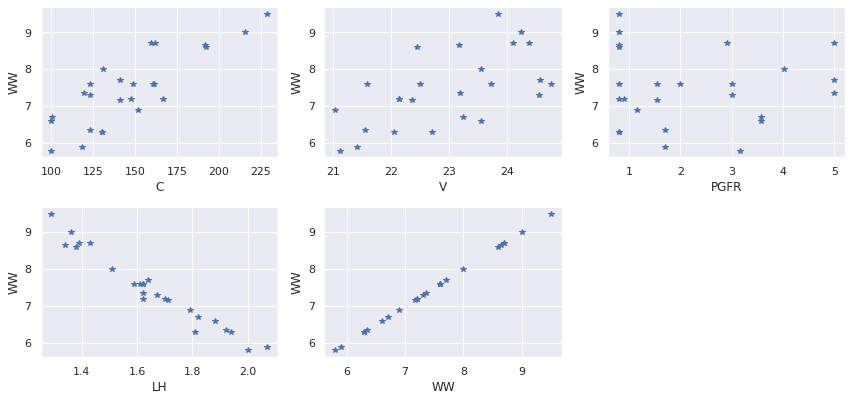

In [5]:
fields = [ 'C', 'V','PGFR', 'LH','WW']
import seaborn as sns
sns.set()

fig = plt.figure()
fig.set_size_inches((12,8))
for i, field in enumerate(fields):
  plt.subplot(3, 3, i + 1)
  plt.plot(data[field], data['WW'], 'b*')
  plt.xlabel(field)
  plt.ylabel('WW')

plt.tight_layout()

X=data[[ 'C', 'V','PGFR']]
Y=data['WW'][:,None]
Z=data['LH'][:,None]


#fig.tight_layout()

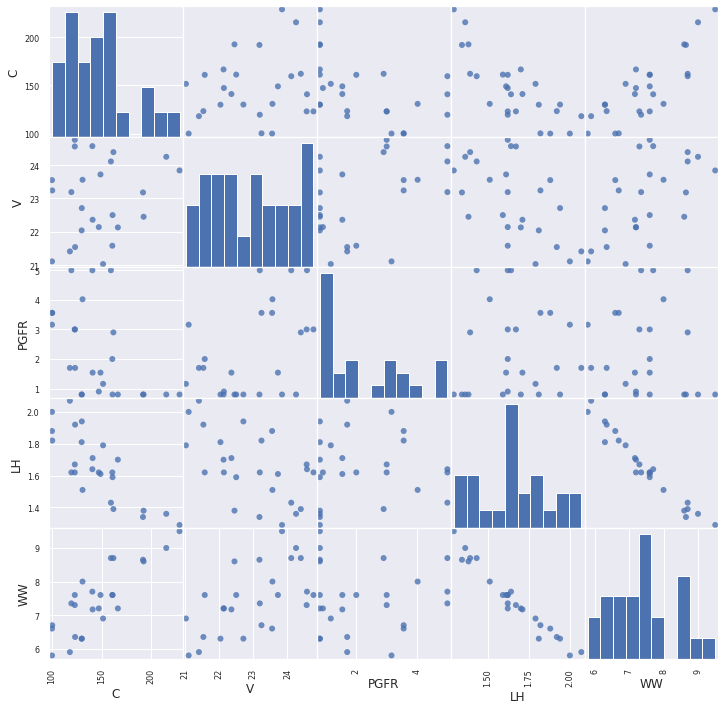

In [6]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
scatter_matrix(data, alpha=0.8, marker='o', figsize = (12,12))
import warnings
warnings.filterwarnings("ignore")

#Wall width prediction

In [7]:
def normalize(X, X_mu, X_std):
  return (X - X_mu)/X_std

def denormalize(Xn, X_mu, X_std):
  return Xn*X_std + X_mu

X_std = X.std(0)
X_mu = X.mean(0)
Xn = normalize(X, X_mu, X_std)

Y_std = Y.std(0)
Y_mu = Y.mean(0)
Yn = normalize(Y, Y_mu, Y_std)

 Split data

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.22, random_state=32)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 19  test samples: 6


#Results:

In [62]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 39/39 [00:00<00:00, 49.83it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
[03:06:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                               R-Squared  RMSE  Time Taken
Model                                                     
SGDRegressor                        0.86  0.27        0.01
LinearSVR                           0.85  0.28        0.01
AdaBoostRegressor                   0.80  0.33        0.06
Ridge                               0.80  0.33        0.01
HuberRegressor                      0.79  0.34        0.01
PassiveAggressiveRegressor          0.78  0.34        0.01
BayesianRidge                       0.78  0.34        0.01
RidgeCV                             0.78  0.34        0.01
ElasticNetCV                        0.77  0.35        0.04
LassoCV                             0.77  0.35        0.07
OrthogonalMatchingPursuitCV         0.77  0.35        0.01


In [63]:
predictions

,R-Squared,RMSE,Time Taken
Model,,,
SGDRegressor,0.86,0.27,0.01
LinearSVR,0.85,0.28,0.01
AdaBoostRegressor,0.80,0.33,0.06
Ridge,0.80,0.33,0.01
HuberRegressor,0.79,0.34,0.01
PassiveAggressiveRegressor,0.78,0.34,0.01
BayesianRidge,0.78,0.34,0.01
RidgeCV,0.78,0.34,0.01
ElasticNetCV,0.77,0.35,0.04


###GBR 

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=5000, random_state=32, learning_rate=0.1 )

#START TRAINING
GBR.fit(X_train,y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

 
print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()


-Gradient boosting regressor-
-----------------------------
MSE test: 0.13672266092644467

R2:  0.7414907671558819
RMSE:  0.3697602749437055
MAE:  0.2731128313860148
IM:  0.5273900862357813



### GPs

In [65]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
 
GP=GPR(kernel=kernel, n_restarts_optimizer=9, alpha=0.01, normalize_y=True)
 
#Training
GP.fit(X_train,y_train)
 
#Testing
y_star_train = GP.predict(X_train)
y_pred = GP.predict(X_test)
 
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, y_star_train)
 
print("Gaussian Process")
print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_pred)
print('R2_test: ',R2_test)
print()
""" 
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

Gaussian Process
MSE train: 0.010224461411457674
MSE test: 0.32980486299565287
MSE train < MSE test? True

R2_train:  0.9898758601208846
R2_test:  0.3764193766888918

R2:  0.3764193766888918
RMSE:  0.5742863945764803
MAE:  0.4251484592870057
IM:  0.9483716935879296



### RFR

In [66]:
from sklearn.ensemble import RandomForestRegressor
#KERNEL
RFR=RandomForestRegressor(n_estimators=1000,max_depth=20)

#START TRAINING
RFR.fit(X_train,y_train)
#PREDICTION
y_pred=RFR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-----------------------------
MSE test: 0.24346791713334456

R2:  0.5396615012184662
RMSE:  0.4934246823308949
MAE:  0.3559566666666636
IM:  0.7629446894357566



### XGB

In [67]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0, n_estimators=1000, max_depth=8)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [68]:
print(xgbr)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [69]:
score = xgbr.score(X_test, y_test)  
print("Training score: ", score)

Training score:  0.64079941992999


In [70]:
print("-XGBRegressor -")
print("------------------")

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-XGBRegressor -
------------------
MSE test: 0.18997719568147198

R2:  0.64079941992999
RMSE:  0.4358637352217686
MAE:  0.28809523582458496
IM:  0.6340355804755178



### AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostRegressor

print(" AdaBoost -")
print("------------------")

Ada = AdaBoostRegressor(random_state=32, n_estimators=1000)
#START TRAINING
Ada.fit(X_train,y_train)
#PREDICTION
y_pred=Ada.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

 AdaBoost -
------------------
MSE test: 0.09537083333333342

R2:  0.8196769957983192
RMSE:  0.30882168533529736
MAE:  0.21083333333333312
IM:  0.41513601821824275



### MLP

In [73]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(hidden_layer_sizes=5,solver='lbfgs',learning_rate='adaptive',activation='relu',random_state=32, max_iter=1000)
#MLP = MLPRegressor(hidden_layer_sizes=(1000,1000,1000), activation='relu', solver='adam', max_iter=800)

#START TRAINING
MLP.fit(X_train,y_train)
#PREDICTION
y_pred=MLP.predict(X_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()



R2:  0.6986924520781221
RMSE:  0.30882168533529736
MAE:  0.3538787265361316
IM:  0.5580208104209577



### DTR

In [74]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(max_depth=20)

#START TRAINING
DT.fit(X_train,y_train)
#PREDICTION
y_pred=DT.predict(X_test)
print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()



R2:  -0.01470588235294068
RMSE:  0.30882168533529736
MAE:  0.5333333333333333
IM:  1.1871997748733942



### Linear SVR

In [75]:
from sklearn.svm import LinearSVR

SVR=LinearSVR( random_state=42)

#START TRAINING
SVR.fit(X_train,y_train)
#PREDICTION
y_pred=SVR.predict(X_test)
print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()



R2:  0.8261670599847318
RMSE:  0.30882168533529736
MAE:  0.26315123960367853
IM:  0.44140378257626867



# Comparisson

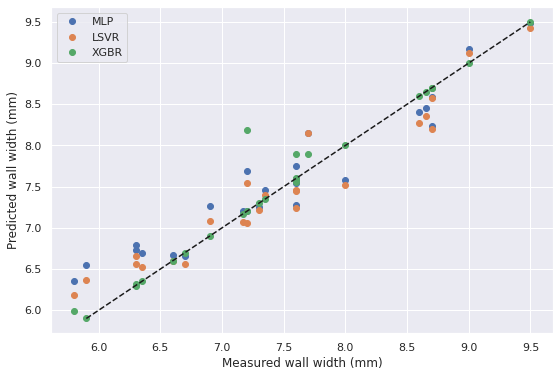

In [77]:
models = [ MLP ,  SVR, xgbr]
labels = ['MLP', 'LSVR', 'XGBR']

fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(X)
  plt.plot(Y, y_pred, 'o' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('Predicted wall width (mm)')
plt.xlabel('Measured wall width (mm)')
plt.legend()  
  

Worst

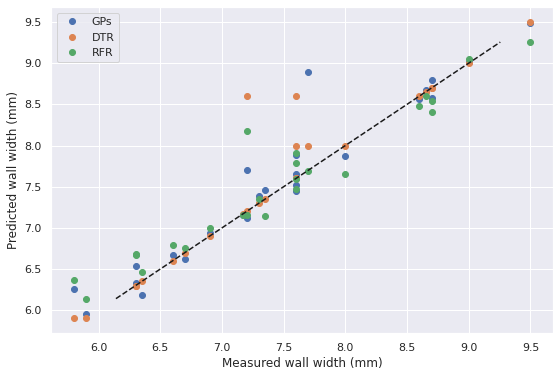

In [82]:
models = [ GP, DT, RFR  ]
labels = [ 'GPs', 'DTR', 'RFR']

fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(X)
  plt.plot(Y, y_pred, 'o' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('Predicted wall width (mm)')
plt.xlabel('Measured wall width (mm)')
plt.legend()  

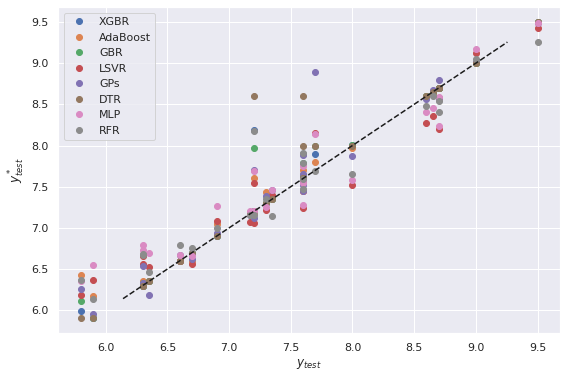

In [79]:
models = [xgbr, Ada, GBR, SVR, GP, DT, MLP, RFR ]
labels = ['XGBR', 'AdaBoost', 'GBR', 'LSVR',  'GPs', 'DTR', 'MLP', 'RFR']

fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(X)
  plt.plot(Y, y_pred, 'o' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('$y^*_{test}$')
plt.xlabel('$y_{test}$')
plt.legend()

# CROSS-VALIDATION

In [80]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [xgbr, Ada, GBR, SVR, GP, DT, MLP, RFR ]
labels = ['XGBR', 'AdaBoost', 'GBR', 'LSVR',  'GPs', 'DTR', 'MLP', 'RFR']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels): 
  y_star_train = mod.predict(X_train)
 
  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)
  
 
  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
           XGBR | 0.7029 | 0.2508 | 0.4184 | 0.7170 
       AdaBoost | 0.4841 | 0.4191 | 0.5449 | 0.9911 
            GBR | 0.5559 | 0.3552 | 0.5046 | 0.8984 
           LSVR | 0.8286 | 0.1296 | 0.3045 | 0.5017 
            GPs | 0.4116 | 0.3081 | 0.4291 | 0.9157 
            DTR | 0.4451 | 0.4784 | 0.6153 | 1.0793 
            MLP | 0.8878 | 0.0955 | 0.2764 | 0.4296 
            RFR | 0.6820 | 0.3039 | 0.4702 | 0.7913 
--------------------------------------------------------------
